In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix

In [2]:
data=datasets.load_iris()
x=data.data
y=data.target
y=pd.DataFrame(y)

In [3]:
main_data=pd.DataFrame()
main_data["sepal_length_cm"]=x[:,0]
main_data["septal_width_cm"]=x[:,1]
main_data["peatel_length_cm"]=x[:,2]
main_data["petal_width_cm"]=x[:,3]
main_data["species"]=y[:]
main_data["species_name"]=y.replace([0,1,2],["setosa","versicolor","verginica"])

main_data.head()

,sepal_length_cm,septal_width_cm,peatel_length_cm,petal_width_cm,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


setosa        50
versicolor    50
verginica     50
Name: species_name, dtype: int64

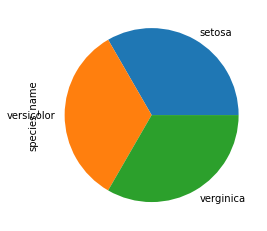

In [4]:
main_data["species_name"].value_counts().plot(kind="pie")
main_data["species_name"].value_counts()

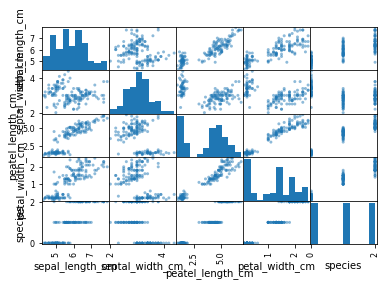

In [5]:
scatter_matrix(main_data)
plt.show()

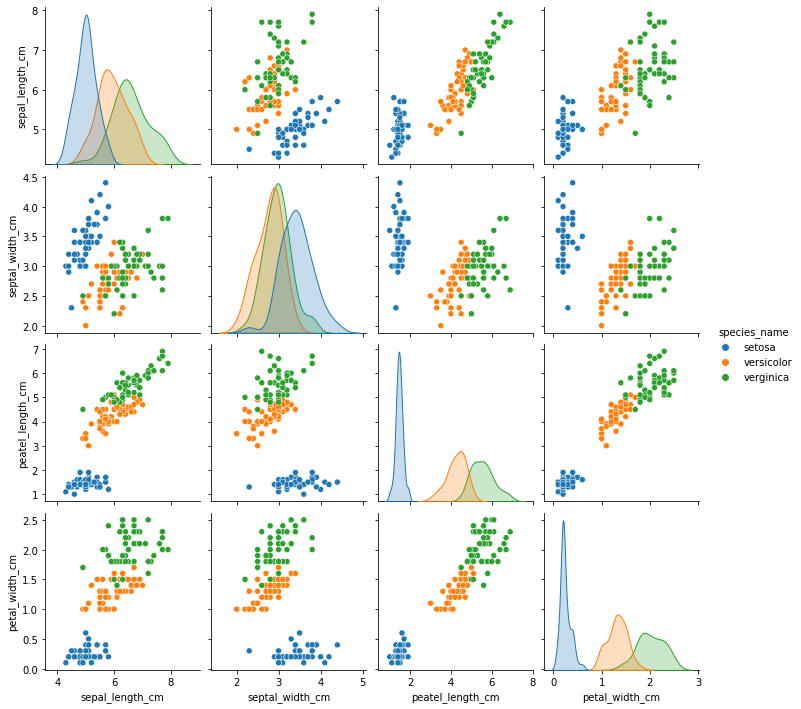

In [6]:
sns.pairplot(main_data.drop(columns=["species"]),hue="species_name")
plt.show()

                  sepal_length_cm  septal_width_cm  peatel_length_cm  \
sepal_length_cm          1.000000        -0.117570          0.871754   
septal_width_cm         -0.117570         1.000000         -0.428440   
peatel_length_cm         0.871754        -0.428440          1.000000   
petal_width_cm           0.817941        -0.366126          0.962865   
species                  0.782561        -0.426658          0.949035   

                  petal_width_cm   species  
sepal_length_cm         0.817941  0.782561  
septal_width_cm        -0.366126 -0.426658  
peatel_length_cm        0.962865  0.949035  
petal_width_cm          1.000000  0.956547  
species                 0.956547  1.000000  


<AxesSubplot:>

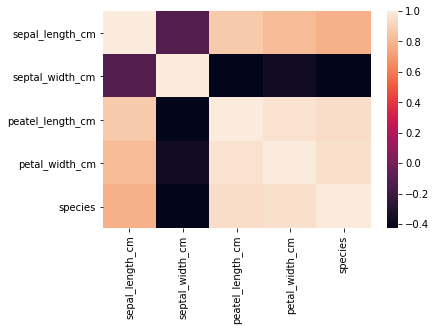

In [7]:
print(pd.DataFrame(main_data.drop(columns="species_name").corr()))
sns.heatmap(main_data.drop(columns="species_name").corr())

In [8]:

x_train,x_test,y_train,y_test=train_test_split(main_data.drop(columns=["species_name","species"]),main_data["species"],test_size=.2,random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
pa={"n_neighbors":[3,5,7,9,11,13],
    "weights" : ['uniform', 'distance']
   }
kd=KNeighborsClassifier(n_neighbors=3)
grid=GridSearchCV(kd,param_grid=pa,cv=10)
grid.fit(x_train,y_train)

print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(n_neighbors=11)
0.9583333333333334
{'n_neighbors': 11, 'weights': 'uniform'}


In [10]:
def Boundary_plot(x_train,y_train):
    x=np.arange(start=x_train.iloc[:,0].min()-1,stop=x_train.iloc[:,0].max()+1,step=0.05)
    y=np.arange(start=x_train.iloc[:,1].min()-1,stop=x_train.iloc[:,1].max()+1,step=0.05)
    xx,yy=np.meshgrid(x,y)
    z=np.array([xx.ravel(),yy.ravel()]).T
    
    knn=KNeighborsClassifier(n_neighbors=11)
    knn.fit(x_train,y_train)
    p1=knn.predict(z)
    p1=p1.reshape(xx.shape)
    
    Svm=SVC()
    Svm.fit(x_train,y_train)
    p2=Svm.predict(z)
    p2=p2.reshape(xx.shape)
    
    plt.subplot(1,2,1)
    plt.title("KNN")
    plt.contourf(xx,yy,p1)
    sns.scatterplot(x_train.iloc[:,0],x_train.iloc[:,1],hue=y_train)
    
    plt.subplot(1,2,2)
    plt.title("SVM")
    plt.contourf(xx,yy,p2)
    sns.scatterplot(x_train.iloc[:,0],x_train.iloc[:,1],hue=y_train)
    
    
    plt.show()
    
    
    
    

In [11]:
x_train
x_train.iloc[:,[0,1]]
x_train.iloc[:,[0,1]].shape


(120, 2)

c:\users\harshit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\harshit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


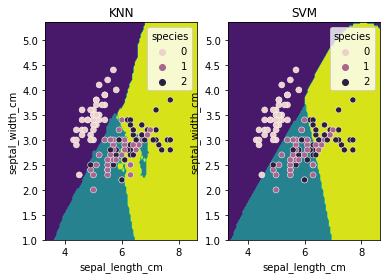

In [12]:
Boundary_plot(x_train.iloc[:,[0,1]],y_train)

c:\users\harshit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\harshit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


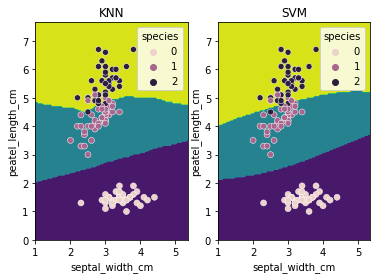

In [13]:
Boundary_plot(x_train.iloc[:,[1,2]],y_train)

c:\users\harshit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\harshit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


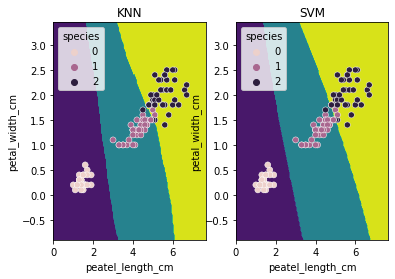

In [14]:
Boundary_plot(x_train.iloc[:,[2,3]],y_train)

In [15]:
model1=KNeighborsClassifier(n_neighbors=11)
model1.fit(x_train,y_train)
predicted=model1.predict(x_train)
predicted2=model1.predict(x_test)



In [16]:
print("            KNN")
print("score on training dataset")
print("score :-   ",model1.score(x_train,y_train))
print("accuracy_score   :-    ",accuracy_score(predicted,y_train))
print("score on test dataset")
print("score  :-  ",model1.score(x_test,y_test))
print("accuracy_score  :-   ",accuracy_score(predicted2,y_test))




print("    KNN")

print(" training dataset ")
print(pd.DataFrame(confusion_matrix (predicted,y_train)))
print("  testing dataset   ")
print(pd.DataFrame(confusion_matrix (predicted2,y_test)))

            KNN
score on training dataset
score :-    0.9583333333333334
accuracy_score   :-     0.9583333333333334
score on test dataset
score  :-   1.0
accuracy_score  :-    1.0
    KNN
 training dataset 
    0   1   2
0  40   0   0
1   0  37   1
2   0   4  38
  testing dataset   
    0  1   2
0  10  0   0
1   0  9   0
2   0  0  11


In [17]:

print("                                         KNN   ")
print("       train  :-   ")
print(classification_report(predicted,y_train))
print("       test   :-   ")
print(classification_report(predicted2,y_test))


                                         KNN   
       train  :-   
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.90      0.97      0.94        38
           2       0.97      0.90      0.94        42

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

       test   :-   
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
model2=SVC()
model2.fit(x_train,y_train)
predicted_svm=model1.predict(x_train)
predicted2_svm=model1.predict(x_test)


In [19]:
print("                  SVM              ")
print("score on training dataset")
print("score :-   ",model2.score(x_train,y_train))
print("accuracy_score   :-    ",accuracy_score(predicted_svm,y_train))
print("score on test dataset")
print("score  :-  ",model2.score(x_test,y_test))
print("accuracy_score  :-   ",accuracy_score(predicted2_svm,y_test))




print(" SVM ")
print(" training dataset ")
print(pd.DataFrame(confusion_matrix (predicted_svm,y_train)))
print("  testing dataset   ")
print(pd.DataFrame(confusion_matrix (predicted2_svm,y_test)))


                  SVM              
score on training dataset
score :-    0.975
accuracy_score   :-     0.9583333333333334
score on test dataset
score  :-   1.0
accuracy_score  :-    1.0
 SVM 
 training dataset 
    0   1   2
0  40   0   0
1   0  37   1
2   0   4  38
  testing dataset   
    0  1   2
0  10  0   0
1   0  9   0
2   0  0  11


In [20]:
print("                                         SVM   ")
print("       train    :- ")
print(classification_report(predicted_svm,y_train))
print("       test    :- ")
print(classification_report(predicted2_svm,y_test))




                                         SVM   
       train    :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.90      0.97      0.94        38
           2       0.97      0.90      0.94        42

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

       test    :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
scaling=StandardScaler()
scaling.fit(x_train)
x_train_scaled=scaling.transform(x_train)
x_test_scaled=scaling.transform(x_test)


In [22]:
main_model=KNeighborsClassifier(n_neighbors=11)
main_model.fit(x_train,y_train)
y_predict=main_model.predict(x_test)
print(classification_report(y_predict,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
main_data.head()

,sepal_length_cm,septal_width_cm,peatel_length_cm,petal_width_cm,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
def my_pre(data):
    ac=scaling.transform(data)
    pre=main_model.predict(ac)
    return pre


In [ ]:
sepal_length_cm=float(input("sepal_length_cm : -"))
septal_width_cm=float(input("septal_width_cm :-"))
peatel_length_cm=float(input("peatel_length_cm :-"))
petal_width_cm=float(input("petal_width_cm :-"))
pre_pro=np.array([sepal_length_cm,septal_width_cm,peatel_length_cm,petal_width_cm]).reshape(-1,1).T
prediction=my_pre(pre_pro)
if prediction==0:
    print("satosa")
elif prediction==1:
    print("versicolor")
elif prediction==2:
    print("verginica")
